In [210]:
import matplotlib.pyplot as plt
import numpy as np
import emcee
import scipy.optimize as op
import corner
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [225]:
random.seed(10)
#parametros reales
m_t=0.35
b_t=0.75
sigma= 0.01

Npasos=100

#funcion y arreglo de datos
x=np.random.rand(Npasos)
y=m_t*x+b_t
yerr= 0.02+ 0.03*np.random.uniform()

<Container object of 3 artists>

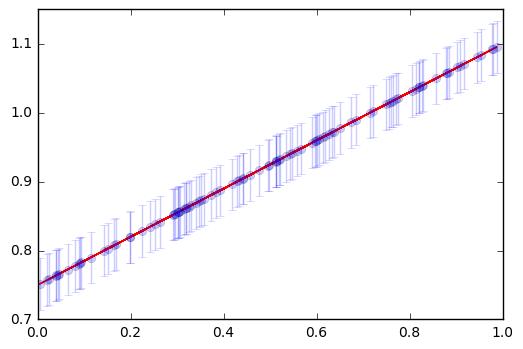

In [226]:
plt.plot(x,y,color='r',alpha=1)
plt.errorbar(x,y,yerr=yerr, fmt='o',alpha=0.2)

In [227]:
#definir prior
def prior(theta):
    m,b=theta
    if ((0 < m <1.2) and (0< b <0.95)):
        p = 0.
        return p 
    
    return -np.infty
        

#modelo
def mod(x,m,b):    
    return m*x+b

#likelihood
def likeli(theta,x,y,yerr):
    m,b=theta
    xi2=(((y-mod(x,m,b))**2)/yerr**2).sum()
    return xi2

#funcion de probabilidad completa de a cuerdo a emcee
def prob(theta,x,y,yerr):
    p= prior(theta)
    
    if not np.isfinite(p):
        return -np.infty
    return p+likeli(theta,x,y,yerr)

In [228]:
ndim,nwalkers=2,300
sampler = emcee.EnsembleSampler(nwalkers, ndim, prob, args=(x, y, yerr))

In [229]:
#nll = lambda *args: -likeli(*args)
#result = op.minimize(nll, [m_t, b_t], args=(x, y, yerr))
#m_ml, b_ml = result["x"]

In [234]:
#moverse al rededor de un punto
pos = [  0.001*np.random.randn(ndim) for i in range(nwalkers)]

#pos = [result["x"] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]
#algoritmo
paso=1000
sampler.run_mcmc(pos,paso)

(array([[  9.68769297e-06,   1.23035721e-05],
        [  6.60622361e-05,   3.28458184e-06],
        [  5.46186124e-06,   2.01353580e-05],
        [  1.03313289e-03,  -1.88063604e-03],
        [  1.81345849e-08,   1.09589073e-07],
        [  6.85049636e-06,   8.79676640e-06],
        [  2.64214215e-05,   2.75903597e-06],
        [  4.28514275e-05,   2.83872866e-06],
        [ -4.35628282e-04,  -6.75313150e-04],
        [  2.19482340e-05,   2.28415413e-05],
        [  2.10079143e-05,   1.56647830e-06],
        [  4.32549538e-06,   7.45191985e-06],
        [ -1.06631320e-03,  -1.59593407e-03],
        [  2.80818750e-06,   3.33779791e-06],
        [ -4.68355295e-04,  -5.47298028e-04],
        [  9.50560217e-04,  -1.16190989e-03],
        [ -8.84932023e-04,  -3.78573920e-04],
        [  1.10949884e-05,   1.01305000e-05],
        [  7.90083105e-05,   1.36561436e-05],
        [  4.47951284e-05,   4.94930755e-06],
        [  1.16143261e-05,   6.80597187e-06],
        [  9.46954039e-06,   1.492

In [241]:
#reacomodar el resultado para usar corner
#para eliminar el burn chain[:, 50:, :].reshape
samples = sampler.chain[:, :, :].reshape((-1, ndim))

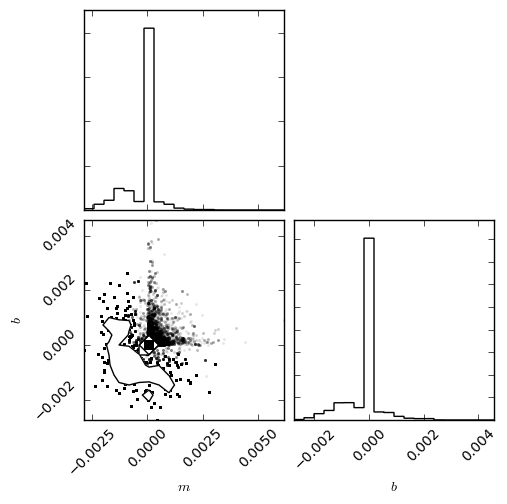

In [242]:
fig = corner.corner(samples, labels=["$m$", "$b$"],
                      truths=[m_t, b_t])

(0.14999999999999997, 1.2000000000000002)

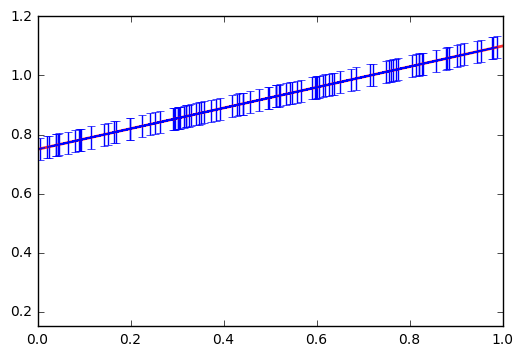

In [233]:
xl = np.array([0., 1])
for m, b in samples[np.random.randint(len(samples), size=100)]:
    plt.plot(xl, m*xl+b, color="b", alpha=0.01)
plt.plot(xl, m_t*xl+b_t, color="r", lw=2, alpha=0.8)
plt.errorbar(x, y, yerr=yerr, fmt="--")
plt.ylim(m_t-0.2)